## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mouse_data_df['Mouse ID'].count()

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dupes = mouse_data_df[mouse_data_df.duplicated(['Mouse ID', 'Timepoint'])]
mouse_dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [27]:
# Optional: Get all the data for the duplicate mouse ID. 
all_mouse_dupes = mouse_data_df[mouse_data_df.duplicated(['Mouse ID',])]
all_mouse_dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_data_df.drop_duplicates(["Mouse ID"])
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [29]:
# Checking the number of mice in the clean DataFrame.
clean_df['Mouse ID'].count()

249

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = mouse_data_df.groupby(['Drug Regimen'])
mean = drug_group['Tumor Volume (mm3)'].mean()
median = drug_group['Tumor Volume (mm3)'].median()
sdev = drug_group['Tumor Volume (mm3)'].std()
error = drug_group['Tumor Volume (mm3)'].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": mean,
                           'Median': median,
                           'Standard Deviation': sdev,
                           'Standard Error of Mean': error})
summary_df


,Mean,Median,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.322552,50.854632,6.507770,0.512884
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = mouse_data_df.groupby(['Drug Regimen','Tumor Volume (mm3)'])
drug_group.aggregate(['mean', 'median', 'std', 'sem'])
# Using the aggregation method, produce the same summary statistics in a single line


Age_months                Weight (g)         \
                                      mean median std sem       mean median   
Drug Regimen Tumor Volume (mm3)                                               
Capomulin    23.343598                 3.0    3.0 NaN NaN       17.0   17.0   
             25.472143                 3.0    3.0 NaN NaN       17.0   17.0   
             28.167397                16.0   16.0 NaN NaN       15.0   15.0   
             28.328531                 3.0    3.0 NaN NaN       17.0   17.0   
             28.430964                22.0   22.0 NaN NaN       17.0   17.0   
...                                    ...    ...  ..  ..        ...    ...   
Zoniferol    68.498639                12.0   12.0 NaN NaN       25.0   25.0   
             68.611061                 2.0    2.0 NaN NaN       28.0   28.0   
             70.827796                12.0   12.0 NaN NaN       25.0   25.0   
             71.108118                20.0   20.0 NaN NaN       26.0   26.0   
             73.324432                20.0   20.0 NaN NaN       26.0   26.0   

                                        Timepoint                 \
                                std sem      mean median std sem   
Drug Regimen Tumor Volume (mm3)                                    
Capomulin    23.343598          NaN NaN      45.0   45.0 NaN NaN   
             25.472143          NaN NaN      40.0   40.0 NaN NaN   
             28.167397          NaN NaN      40.0   40.0 NaN NaN   
             28.328531          NaN NaN      35.0   35.0 NaN NaN   
             28.430964          NaN NaN      45.0   45.0 NaN NaN   
...                              ..  ..       ...    ...  ..  ..   
Zoniferol    68.498639          NaN NaN      40.0   40.0 NaN NaN   
             68.611061          NaN NaN      45.0   45.0 NaN NaN   
             70.827796          NaN NaN      45.0   45.0 NaN NaN   
             71.108118          NaN NaN      40.0   40.0 NaN NaN   
             73.324432          NaN NaN      45.0   45.0 NaN NaN   

                                Metastatic Sites                 
                                            mean median std sem  
Drug Regimen Tumor Volume (mm3)                                  
Capomulin    23.343598                       1.0    1.0 NaN NaN  
             25.472143                       1.0    1.0 NaN NaN  
             28.167397                       0.0    0.0 NaN NaN  
             28.328531                       1.0    1.0 NaN NaN  
             28.430964                       1.0    1.0 NaN NaN  
...                                          ...    ...  ..  ..  
Zoniferol    68.498639                       2.0    2.0 NaN NaN  
             68.611061                       3.0    3.0 NaN NaN  
             70.827796                       2.0    2.0 NaN NaN  
             71.108118                       1.0    1.0 NaN NaN  
             73.324432                       1.0    1.0 NaN NaN  

[1653 rows x 16 columns]

## Bar and Pie Charts

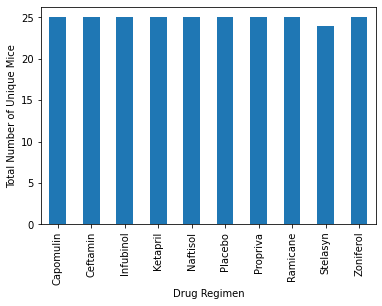

<Figure size 432x288 with 0 Axes>

In [51]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_group = clean_df.groupby("Drug Regimen")
unique_mice = drug_group['Mouse ID'].nunique()

drug_chart = unique_mice.plot(kind='bar')
drug_chart.set_ylabel("Total Number of Unique Mice")

plt.show()
plt.tight_layout()


<BarContainer object of 249 artists>

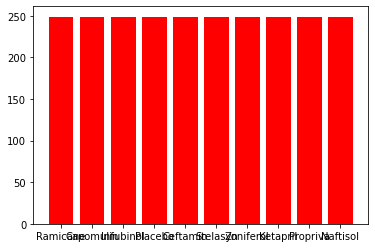

In [55]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = clean_df['Drug Regimen']
plt.bar(x_axis, clean_df["Mouse ID"].nunique(), color='r', align='center')


In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# plt.pie(clean_df['Sex'], labels=pies, colors=colors)
# plt.axis('equal')
# plt.show()


NameError: name 'pies' is not defined

(-1.1017685314144796,
 1.1009347297692742,
 -1.1016630746735625,
 1.1000791940320744)

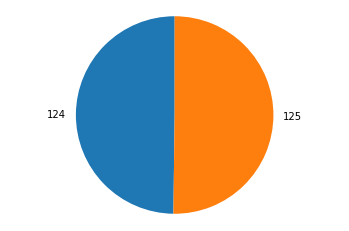

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# plt.pie(len(clean_df["Sex"]))
# plt.axis("equal")
# plt.show()
pie_data = mouse_data_df.groupby("Sex").nunique()["Mouse ID"]
plt.pie(pie_data, labels=pie_data, startangle=90)
plt.axis('equal')


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
